# Introduction

[Gapminder](https://www.gapminder.org/) is an excellent organization aimed at increasing the use and understanding of statistics on a number of global topics. They collect a variety of data from many sources and aim to produce fact-based statistics reflecting the current state of our world. In addition, Gapminder has developed easily-accessible [tools](https://www.gapminder.org/tools/#$chart-type=bubbles) for visualizing the data in creative and informative ways.

The data we will be exploring throughout this guide consists of population, life expectency, and GDP information for many countries over time. If you would like to download this data yourself, click [here](https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv). This data can also be pulled from the class GitHub repository.

In this document, our aims will be two-fold: 

- to gain some experience making visualizations with `matplotlib`, and
- to illustrate tips and tricks in Jupyter notebooks rendered with Quarto.

**Tip:** Outside of the code chunks, we can use markdown and latex like normal. We can add bullet points, write in-line math equations (e.g., $\sqrt{25} + \frac{1}{2}$), longer math equations, etc.

\begin{align*}
(\alpha + \beta)^2 &= \alpha^2 + \alpha \beta + \beta \alpha + \beta^2 \\
&= \alpha^2 + 2 \alpha \beta + \beta^2
\end{align*}

We will begin by loading and cleaning the data. Then we will proceed to visualize the data in various ways.

# Data

Let's begin by loading and cleaning the data. To improve readability and modularity, I have written two external functions, `load_gapminder_data` and `clean_gapminder_data`, and source these functions from their file, `data.py`. Please open these files to see what `load_gapminder_data` and `clean_gapminder_data` are doing and note the function documentation.


In [1]:
#| label: tbl-1
#| tbl-cap: Loaded gapminder data
from data import load_gapminder_data, load_percept_data, \
    clean_gapminder_data, clean_probly_data, clean_numberly_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

gapminder = clean_gapminder_data(load_gapminder_data())
gapminder

country  year  population continent  life_exp  gdp_per_cap
0     Afghanistan  1952   8425333.0      Asia    28.801   779.445314
1     Afghanistan  1957   9240934.0      Asia    30.332   820.853030
2     Afghanistan  1962  10267083.0      Asia    31.997   853.100710
3     Afghanistan  1967  11537966.0      Asia    34.020   836.197138
4     Afghanistan  1972  13079460.0      Asia    36.088   739.981106
...           ...   ...         ...       ...       ...          ...
1699     Zimbabwe  1987   9216418.0    Africa    62.351   706.157306
1700     Zimbabwe  1992  10704340.0    Africa    60.377   693.420786
1701     Zimbabwe  1997  11404948.0    Africa    46.809   792.449960
1702     Zimbabwe  2002  11926563.0    Africa    39.989   672.038623
1703     Zimbabwe  2007  12311143.0    Africa    43.487   469.709298

[1704 rows x 6 columns]

Fortunately, the data was already very clean, so we did not conduct any major modifications to the data. When you do need to perform data cleaning, think carefully about the choices you make in the data cleaning stage. Be sure to document how you cleaned the data and why you made those choices.


# Visualizing the gapminder data (matplotlib)

Next, we put our visualization skills to the test and create different plots with ```matplotlib```.

First, we are interested in exploring life expectancy as a function of GDP. Create a scatterplot of life expectancy versus GDP for the year 2007 using `matplotlib`, where the size of points are based on the population of the country and they are colored by the continent the country resides in. 

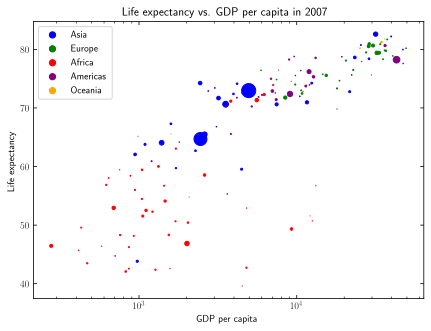

In [2]:
#| label: fig-gap1
#| fig-cap: Scatter plot of life expectancy vs. GDP per capita in 2007.
import matplotlib.pyplot as plt
# use tex
plt.rc('text', usetex=True)

# Create a scatter plot of life expectancy vs. GDP per capita in 2007, colored by continent
gapminder_2007 = gapminder[gapminder['year'] == 2007]
continents = gapminder_2007['continent'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange']
max_pop = max(gapminder_2007['population'])
for i, continent in enumerate(continents):
    subset = gapminder_2007[gapminder_2007['continent'] == continent]
    plt.scatter(subset['gdp_per_cap'], subset['life_exp'], color=colors[i],
                s = 200*subset['population']/max_pop, label=continent)
legend = plt.legend()
for handle in legend.legend_handles:
    handle.set_sizes([40])

plt.title('Life expectancy vs. GDP per capita in 2007')
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.xscale('log')
plt.show()

This was extremely painful to do in matplotlib. How about using seaborn?

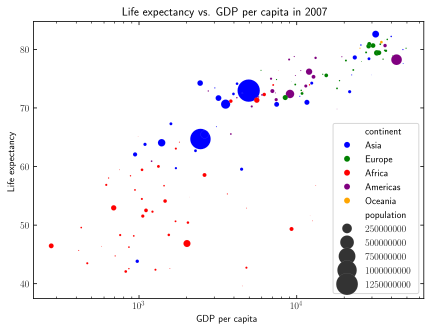

In [3]:
#| label: fig-gap2
#| fig-cap: Same figure as above, but done in seaborn
sns.scatterplot(data=gapminder_2007, x='gdp_per_cap', y='life_exp', hue='continent', size='population',
                hue_order=continents, palette=colors, sizes=(0, 500))
plt.title('Life expectancy vs. GDP per capita in 2007')
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.xscale('log')
plt.show()

It certainly appears as though there is some kind of rapid increase in the low GDP range, which slows to a gradual increase in the high GDP range. Several African countries have surprisingly low life expectency for their GDP.

Next, we explore change in life expectancy over time. For each continent, we'll use `matplotlib` to create a series of boxplots over time, where each data point corresponds to the life expectency of a country for the given year in the given continent.

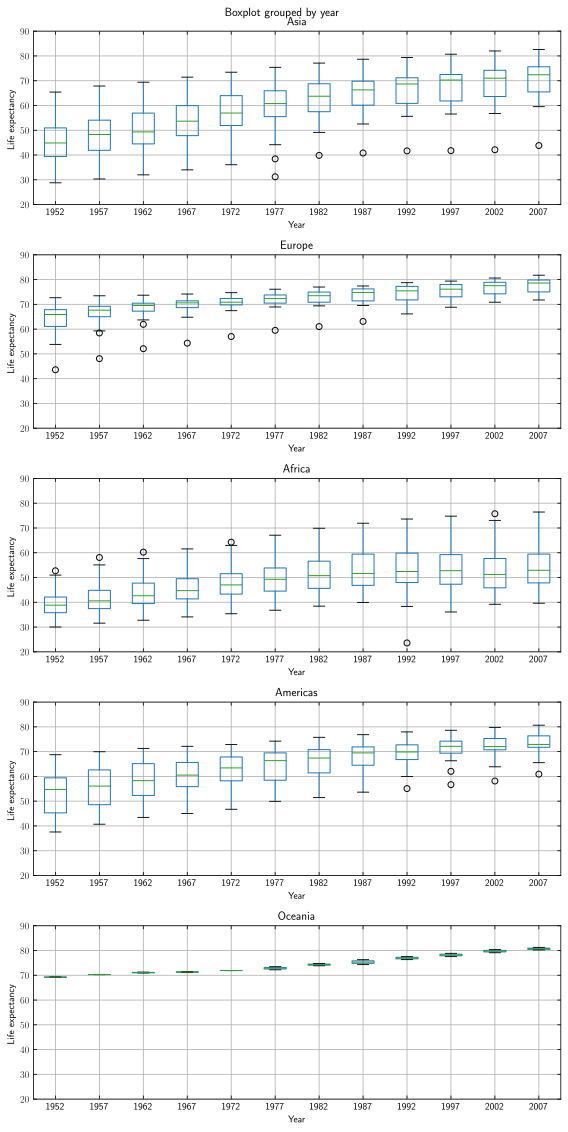

In [4]:
#| label: fig-box1
#| fig-cap: Boxplot of life expectancy over time

fig, axs = plt.subplots(5, 1, figsize=(8,16))
for i, continent in enumerate(continents):
    subset = gapminder[gapminder['continent'] == continent]
    subset.boxplot('life_exp', 'year', ax=axs[i])
    axs[i].set_title(continent)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Life expectancy')
# add some space between subplots
plt.tight_layout()
# make axes have same ymin and ymax
for ax in axs:
    ax.set_ylim(20, 90)

Again, this was a pain to do in matplotlib. Here's seaborn:

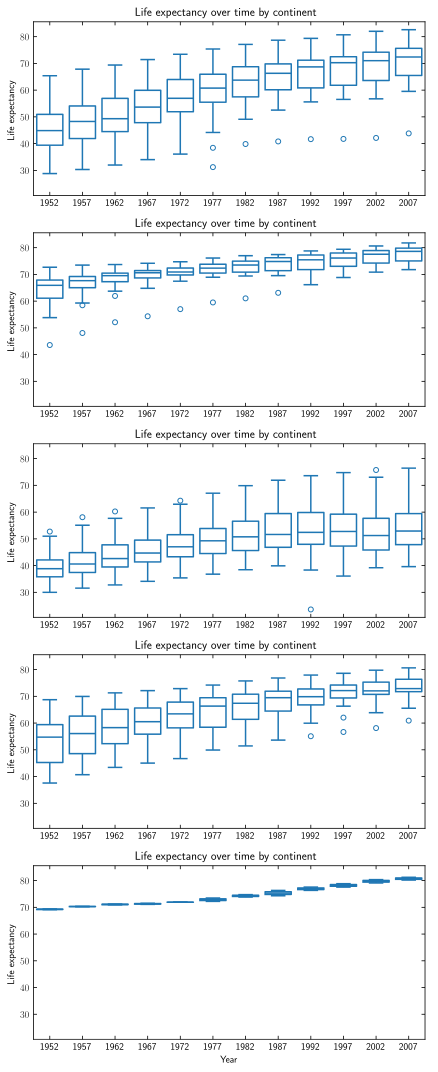

In [5]:
#| label: fig-box2
#| fig-cap: Same figure as above, but done in seaborn

g = sns.catplot(data=gapminder, x='year', y='life_exp', col='continent', kind='box',
            col_wrap=1, height=3, aspect=2, fill=False)
for ax in g.axes:
    ax.set_ylabel('Life expectancy')
    ax.set_xlabel('Year')
    ax.tick_params(labelbottom=True)
    ax.set_title(ax.get_title().split('=')[1])
    ax.spines[['top', 'right']].set_visible(True)
g.set(title='Life expectancy over time by continent')
plt.tight_layout()


We see that the life expectancy increased in Africa from 1950 up until the 1990s but has stayed fairly constant with a median of around 50 years since the 1990s. The Americas, Asia, and Europe on the other hand, have experienced continued growth. Oceania seems to have very narrow results due to the few countries included. 

**Tip:** We can change the size and shape of the figure by modifying ```figsize```.

Now, compute the mean and variance of the GDP for each continent without using `groupby`.

In [6]:
# compute mean and variance of GDP per capita for each continent without using groupby
import numpy as np
for continent in continents:
    subset = gapminder[gapminder['continent'] == continent]
    print(continent)
    print('Mean GDP:', int(np.round(np.mean(subset['gdp_per_cap']),0)))
    print('Variance GDP:', int(np.round(np.var(subset['gdp_per_cap']))))

Asia
Mean GDP: 7902
Variance GDP: 196774343
Europe
Mean GDP: 14469
Variance GDP: 87276908
Africa
Mean GDP: 2194
Variance GDP: 7984371
Americas
Mean GDP: 7136
Variance GDP: 40782196
Oceania
Mean GDP: 18622
Variance GDP: 38751808


Now, do the same using `groupby`

In [7]:
#| label: tbl-group1
#| tbl-cap: Mean and variance of GDP per capita by continent
# do the same using groupby
result = gapminder.groupby('continent')['gdp_per_cap'].agg(["mean", "var"])
result

mean           var
continent                            
Africa      2193.754578  7.997187e+06
Americas    7136.110356  4.091859e+07
Asia        7902.150428  1.972725e+08
Europe     14469.475533  8.752002e+07
Oceania    18621.609223  4.043667e+07

In [8]:
# render the above as a latex table
print(result.to_latex(float_format='%.0f'))

\begin{tabular}{lrr}
\toprule
 & mean & var \\
continent &  &  \\
\midrule
Africa & 2194 & 7997187 \\
Americas & 7136 & 40918591 \\
Asia & 7902 & 197272506 \\
Europe & 14469 & 87520020 \\
Oceania & 18622 & 40436669 \\
\bottomrule
\end{tabular}



Next, we want to ask about raw GDP (i.e. overall GDP for each country, rather than standardized by per capita). Let's create a table that shows the average GDP for each continent in 2007, as well as the number of countries in the continent, and the standard deviation of the GDP.

In [9]:
#| label: tbl-group2
#| tbl-cap: Mean and variance of GDP by continent
gapminder['gdp'] = gapminder['gdp_per_cap'] * gapminder['population']
subset = gapminder[gapminder['year'] == 2007]
result = subset.groupby('continent')['gdp'].agg([np.size, "mean", "std"])
result.rename(columns={'size': 'Number of countries', 'mean': 'Mean GDP', 'std': 'Standard deviation of GDP'}, inplace=True)
result

Number of countries      Mean GDP  Standard deviation of GDP
continent                                                              
Africa                      52  4.577857e+10               9.221360e+10
Americas                    25  7.767234e+11               2.573372e+12
Asia                        33  6.275136e+11               1.343513e+12
Europe                      30  4.931833e+11               6.776464e+11
Oceania                      2  4.036570e+11               4.242659e+11

# Style

Now, we will:
- play around with different themes and color schemes
- learn about a few useful visualization tools

To guide you through this material, I will provide examples using the `gapminder` and `perceptions` data. Put briefly, the perceptions data deals with the perceptions of different words relating to probabilities and numbers. The raw data came from /r/samplesize responses to the following question: What [probability/number] would you assign to the phrase "[phrase]"? You can read more about the perceptions data at (https://github.com/zonination/perceptions).

# Themes and Color Schemes

As I mentioned in the slides, it can become monotonous to look at 100+ plots with the same default `matplotlib` or `seaborn` or `ggplot` color scheme. A simple way to mix things up is to apply a different built-in `matplotlib` theme. Pick your favorite [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) or simply google "custom matplotlib themes" for a plethora of options. Keep in mind the data visualization guidelines we've gone over.

In [10]:
gapminder_orig = load_gapminder_data()
gapminder = clean_gapminder_data(gapminder_orig)

probly_orig = load_percept_data(filename='probly.csv')
numberly_orig = load_percept_data(filename='numberly.csv')
probly = clean_probly_data(probly_orig)
numberly = clean_numberly_data(numberly_orig)

Let's play around with the themes of our scatterplot above

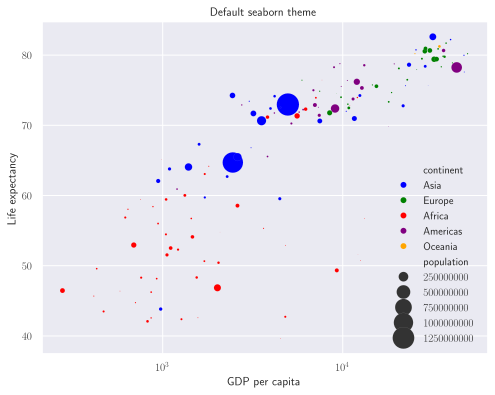

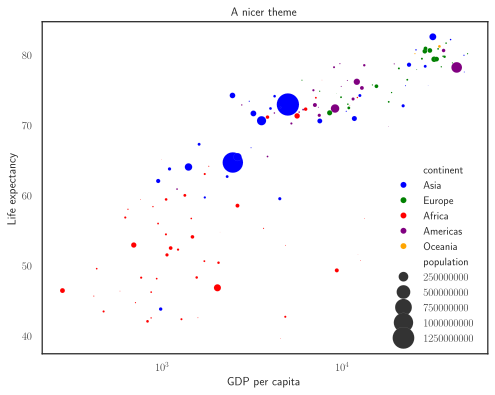

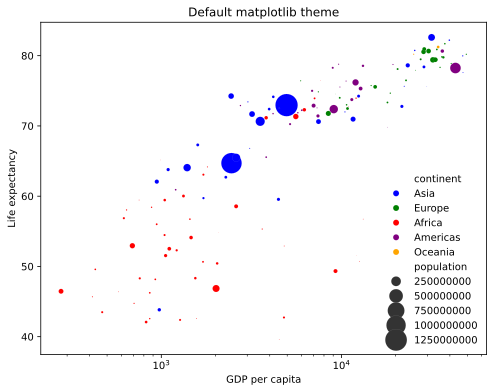

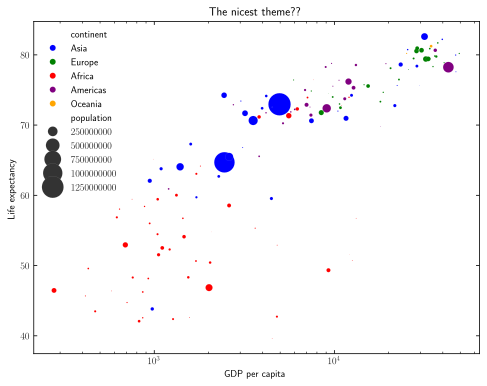

In [11]:
#| label: fig-gap2-themes
def plot_gapminder(gapminder, title):
    gapminder_2007 = gapminder[gapminder['year'] == 2007]
    plt.figure(figsize=(8,6))
    g = sns.scatterplot(data=gapminder_2007, x='gdp_per_cap', y='life_exp', hue='continent', size='population',
                    hue_order=continents, palette=colors, sizes=(0, 500))
    # remove frame from legend
    g.legend(frameon=False)
    plt.title(title)
    plt.xlabel('GDP per capita')
    plt.ylabel('Life expectancy')
    plt.xscale('log')
    plt.show()

sns.set_theme(style="darkgrid")
plot_gapminder(gapminder, 'Default seaborn theme')
sns.set_theme(style="white")
plot_gapminder(gapminder, 'A nicer theme')
plt.style.use('default')
plot_gapminder(gapminder, 'Default matplotlib theme')
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plot_gapminder(gapminder, 'The nicest theme??')

Now, we can compute the mean probability associated with each phrase in the `probly` data and plot the results in a bar graph.

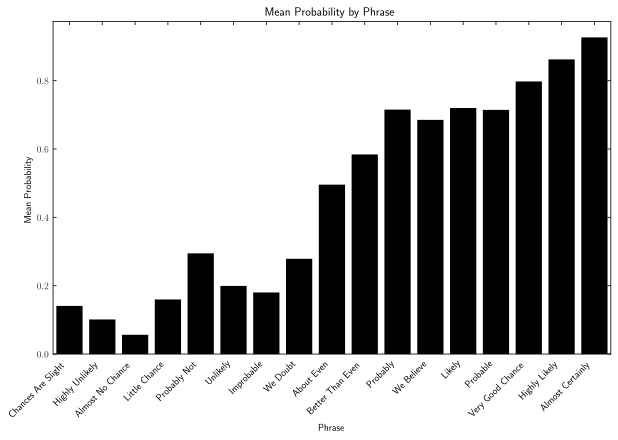

In [12]:
#| label: fig-prob1
#| fig-cap: Bar plot of mean probability by phrase
plt.figure(figsize=(10, 6))
mean_prob = probly.groupby('phrase', observed=False)['prob'].mean().reset_index()
sns.barplot(x='phrase', y='prob', data=mean_prob, color='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Phrase")
plt.ylabel("Mean Probability")
plt.title("Mean Probability by Phrase")
plt.show()

Choosing an appropriate color scheme for your plots can drastically improve the readability of your plots. Sometimes, it is worthwhile to stray from the default colors in your visualization library. The `viridis` color scheme in particular is very nice for continuous data. If you're incredibly ambitious, you can even create your own color palettes.

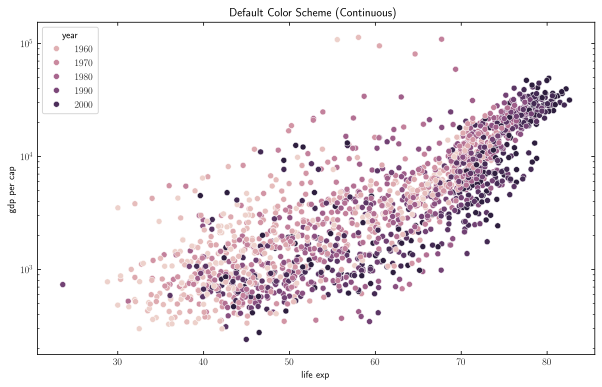

In [13]:
#| label: fig-cs1
# Color Schemes
# Continuous color schemes
plt.figure(figsize=(10, 6))
base_plt = sns.scatterplot(x='life_exp', y='gdp_per_cap', hue='year', data=gapminder)
plt.yscale('log')
plt.title("Default Color Scheme (Continuous)")
plt.show()

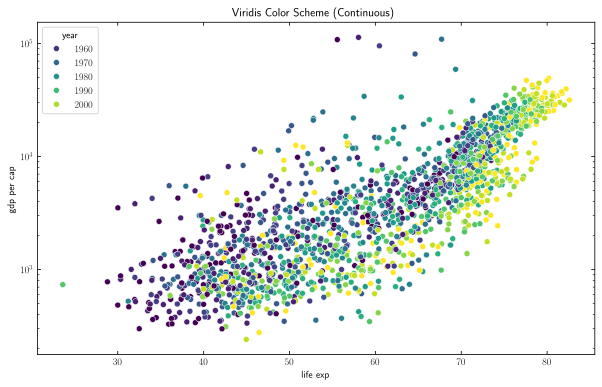

In [14]:
#| label: fig-cs2
plt.figure(figsize=(10, 6))
base_plt = sns.scatterplot(x='life_exp', y='gdp_per_cap', hue='year', palette='viridis', data=gapminder)
plt.yscale('log')
plt.title("Viridis Color Scheme (Continuous)")
plt.show()

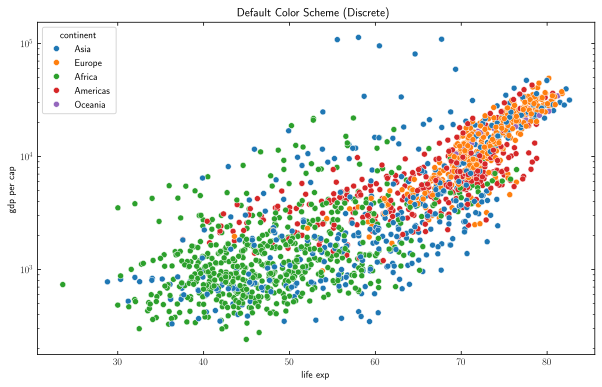

In [15]:
#| label: fig-cs3
# Discrete color schemes
plt.figure(figsize=(10, 6))
base_plt = sns.scatterplot(x='life_exp', y='gdp_per_cap', hue='continent', data=gapminder)
plt.title("Default Color Scheme (Discrete)")
plt.yscale('log')
plt.show()

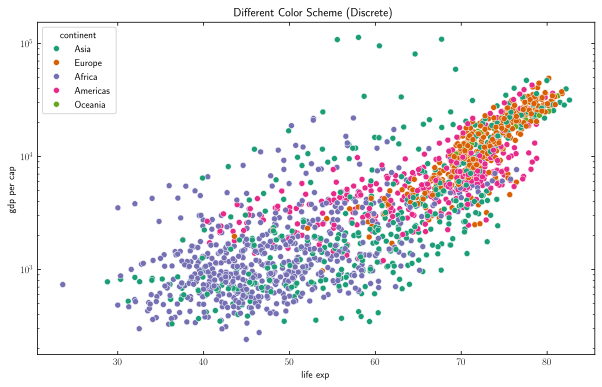

In [16]:
#| label: fig-cs4
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Dark2", n_colors=gapminder['continent'].nunique())
base_plt = sns.scatterplot(x='life_exp', y='gdp_per_cap', hue='continent', palette=palette, data=gapminder)
plt.title("Different Color Scheme (Discrete)")
plt.yscale('log')
plt.show()

Rather than scatterplots, another type of graph that can often be very informative is a heatmap. In @fig-heatmap , we plot a heatmap of the life expectancy across time for various countries.

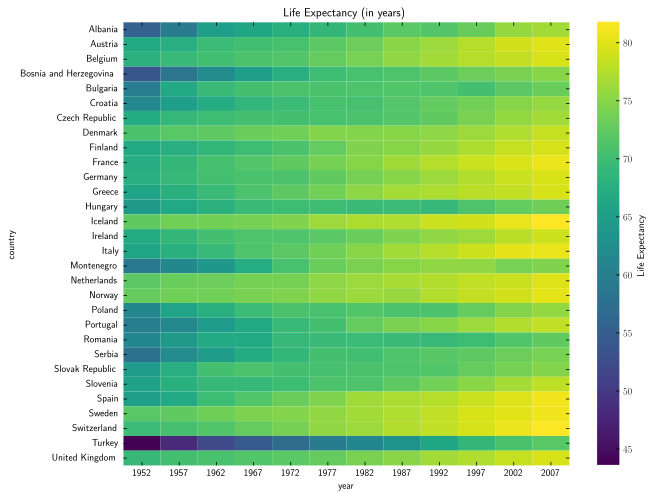

In [17]:
#| label: fig-heatmap
#| fig-cap: Heatmap of life expectancy by country and year.

# Heatmaps
gapminder_wide = gapminder[gapminder['continent']=='Europe'].pivot(index='country', columns='year', values='life_exp')
plt.figure(figsize=(10, 8))
sns.heatmap(gapminder_wide, cmap="viridis", cbar_kws={'label': 'Life Expectancy'})
plt.title("Life Expectancy (in years)")
plt.show()

We can make a similar plot using the `probly` data.

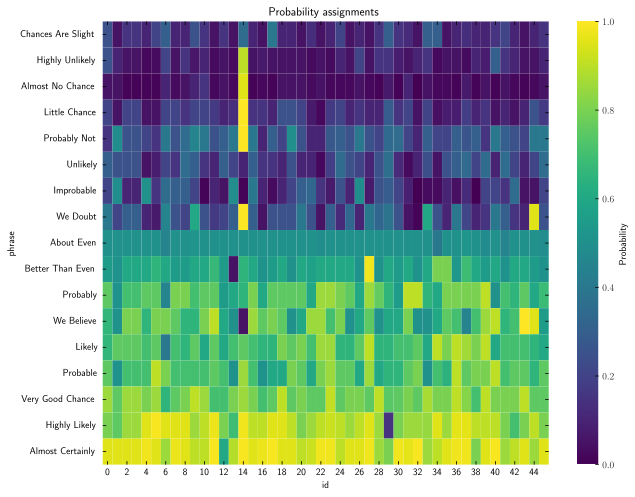

In [18]:

#| label: fig-heatmap2
#| fig-cap: Heatmap of probability by phrase and sample

# Heatmaps
probly_wide = probly.pivot(index='phrase', columns='id', values='prob')
plt.figure(figsize=(10, 8))
sns.heatmap(probly_wide, cmap="viridis", cbar_kws={'label': 'Probability'})
plt.title("Probability assignments")
plt.show()

It may be informative to look at multiple pair-wise relationships in the data in a single plot. The `pairplot` function of seaborn lets us do this, allowing us to plot the pairwise relationships between many different variables at once.

In [19]:
#| label: fig-pairplot
#| fig-cap: Pair plot of 'population', 'gdp_per_cap', 'life_exp' and colored by 'continent'
g = sns.pairplot(data=gapminder, vars=['population', 'gdp_per_cap', 'life_exp'], hue='continent')
for axs in g.axes:
    for ax in axs:
        ax.spines[['top', 'right']].set_visible(True)
plt.suptitle("Pair Plot", y=1.02)
plt.show()

We can also make "ridgeline" plots, as in this example:

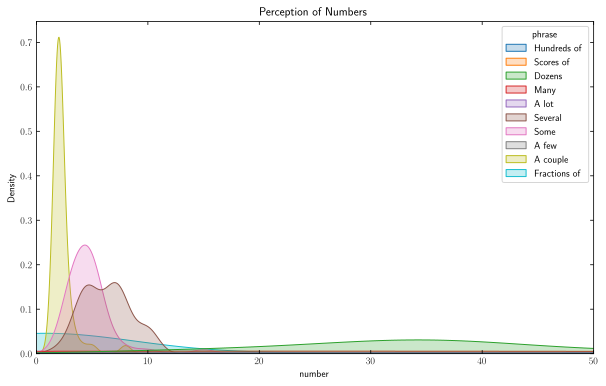

In [20]:
#| label: fig-ridgeline
#| fig-cap: Ridgeline Plots of Perception of Numbers

plt.figure(figsize=(10, 6))
sns.kdeplot(data=numberly, x='number', hue='phrase', fill=True, common_norm=False)
plt.xlim(0, 50)
plt.title("Perception of Numbers")
plt.show()

Sometimes, it may be useful to organize multiple plots side-by-side. Here is one way to do this in `matplotlib`.

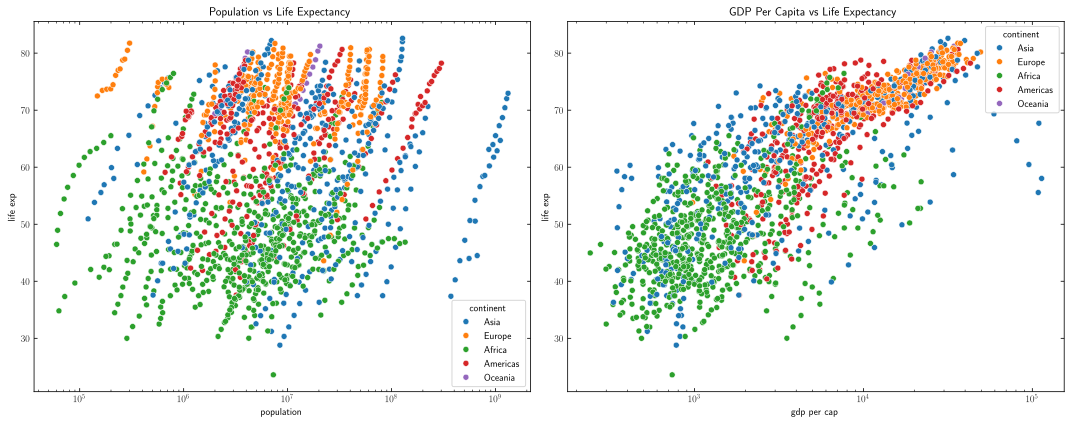

In [21]:
#| label: fig-sidebyside
#| fig-cap: Side-by-side plots of Population vs Life Expectancy and GDP Per Capita vs Life Expectancy

# Side-by-side Plots
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=gapminder, x='population', y='life_exp', hue='continent')
plt.xscale('log')
plt.title("Population vs Life Expectancy")

plt.subplot(1, 2, 2)
sns.scatterplot(data=gapminder, x='gdp_per_cap', y='life_exp', hue='continent')
plt.xscale('log')
plt.title("GDP Per Capita vs Life Expectancy")

plt.tight_layout()
plt.show()